In [1]:
import pandas as pd 

In [2]:
import statistics

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# it contains regression results 
filenames = ["results/result_2019-12-10_18-32-10/regression_AAUP_results.csv", 
             "results/result_2019-12-10_18-32-10/regression_Cities_results.csv", 
             "results/result_2019-12-10_18-32-10/regression_Forbes_results.csv", 
             "results/result_2019-12-10_18-32-10/regression_MetacriticMovies_results.csv", 
             "results/result_2019-12-10_18-32-10/regression_MetacriticAlbums_results.csv"]

In [6]:
data = pd.DataFrame()
for filename in filenames:
    curr_data = pd.read_csv(filename, keep_default_na=False)
    frames = [data, curr_data]
    data = pd.concat(frames)

In [7]:
data.head()

,task_name,gold_standard_file,model_name,model_configuration,root_mean_squared_error
0,Regression,AAUP,KNN,K=3,70.100974
1,Regression,AAUP,KNN,K=3,69.835546
2,Regression,AAUP,KNN,K=3,69.592306
3,Regression,AAUP,KNN,K=3,68.918789
4,Regression,AAUP,KNN,K=3,70.500928


In [8]:
# the best method able to manage any dataset used as gold standard
best_result = data[data.root_mean_squared_error==min(data.root_mean_squared_error)]

In [9]:
best_result

,task_name,gold_standard_file,model_name,model_configuration,root_mean_squared_error
22,Regression,MetacriticAlbums,LR,,11.524901


In [10]:
# the worst method in working with any dataset used as gold standard
worst_result = data[data.root_mean_squared_error==max(data.root_mean_squared_error)]

In [11]:
worst_result

,task_name,gold_standard_file,model_name,model_configuration,root_mean_squared_error
14,Regression,AAUP,M5,,91.05142


In [12]:
gold_standard = data.gold_standard_file.unique()

In [13]:
models_df = pd.DataFrame([], columns=['file', 'id', 'approach', 'conf', 'min', 'max', 'mean', 'standard_dev'])

In [14]:
# it calculates the min, max, average and standard deviation for each model and, if more configuration are tested, for each conf
for file in gold_standard:
    gold_standard_data = data[data['gold_standard_file']==file]
    models = gold_standard_data.model_name.unique()
    
    for m in models:
        model_data = gold_standard_data[gold_standard_data['model_name']==m]
        model_configurations = model_data.model_configuration.unique()

        if len(model_configurations)>1:
            min_rmse = min(model_data['root_mean_squared_error'])
            best_conf = model_data[model_data['root_mean_squared_error']==min_rmse].model_configuration.values[0]
            best_conf_df = model_data[model_data['model_configuration']==best_conf]
            
            model_id = m+' '+best_conf
            
            model_rmse = best_conf_df.root_mean_squared_error
            max_rmse = max(model_rmse)
            mean_rmse = sum(model_rmse)/len(model_rmse)
            stdev_rmse = statistics.stdev(model_rmse)
            
            values = {'file': file, 'id' : model_id, 'approach' : m, 'conf' : conf, 
                      'min':min_rmse, 'max':max_rmse, 'mean':mean_rmse, 'standard_dev':stdev_rmse}
            models_df = models_df.append(values, ignore_index=True)

        else:
            conf = model_configurations[0]

            model_rmse = model_data.root_mean_squared_error
            min_rmse = min(model_rmse)
            max_rmse = max(model_rmse)
            mean_rmse = sum(model_rmse)/len(model_rmse)
            stdev_rmse = statistics.stdev(model_rmse)

            model_id = m+' '+conf

            values = {'file': file, 'id' : model_id, 'approach' : m, 'conf' : conf, 
                      'min':min_rmse, 'max':max_rmse, 'mean':mean_rmse, 'standard_dev':stdev_rmse}
            models_df = models_df.append(values, ignore_index=True)   

In [15]:
models_df

,file,id,approach,conf,min,max,mean,standard_dev
0,AAUP,KNN K=3,KNN,K=3,68.781675,70.500928,69.562932,0.551729
1,AAUP,M5,M5,,84.381095,91.051420,88.456134,2.125054
2,AAUP,LR,LR,,60.621914,62.166172,61.458090,0.515045
3,Cities,KNN K=3,KNN,K=3,14.142227,14.996545,14.578379,0.290759
4,Cities,M5,M5,,21.869611,26.196099,23.858623,1.350624
5,Cities,LR,LR,,28.267730,32.863943,30.889955,1.310695
6,Forbes,KNN K=3,KNN,K=3,33.856582,34.922806,34.294946,0.389875
7,Forbes,M5,M5,,46.529836,52.224101,49.157352,1.816904
8,Forbes,LR,LR,,34.769066,35.579306,35.048309,0.269028
9,MetacriticMovies,KNN K=3,KNN,K=3,18.485689,18.942510,18.744432,0.148148


Text(0, 0.5, 'Mean value')

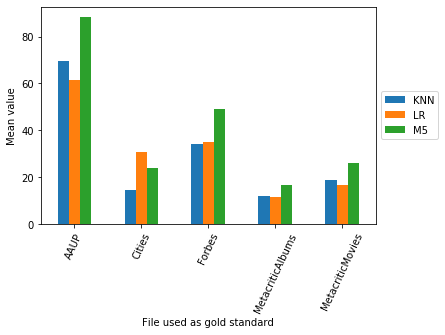

In [16]:
comparison_plot = models_df.pivot(index='file', columns='approach', values='mean').plot(kind='bar')
comparison_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=65)
plt.xlabel('File used as gold standard')
plt.ylabel('Mean value')

Text(0, 0.5, 'The best value (min)')

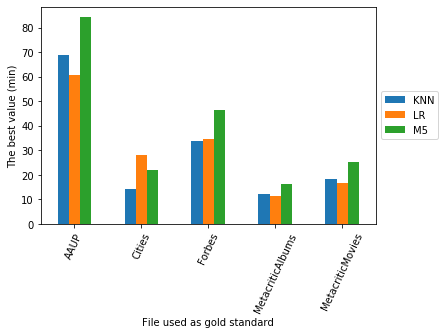

In [17]:
comparison_plot = models_df.pivot(index='file', columns='approach', values='min').plot(kind='bar')
comparison_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=65)
plt.xlabel('File used as gold standard')
plt.ylabel('The best value (min)')